
<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 60px; font-family:Times New Roman;font-style:Bold;text-align: center;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:100px; "><b>Car Price</b></p>



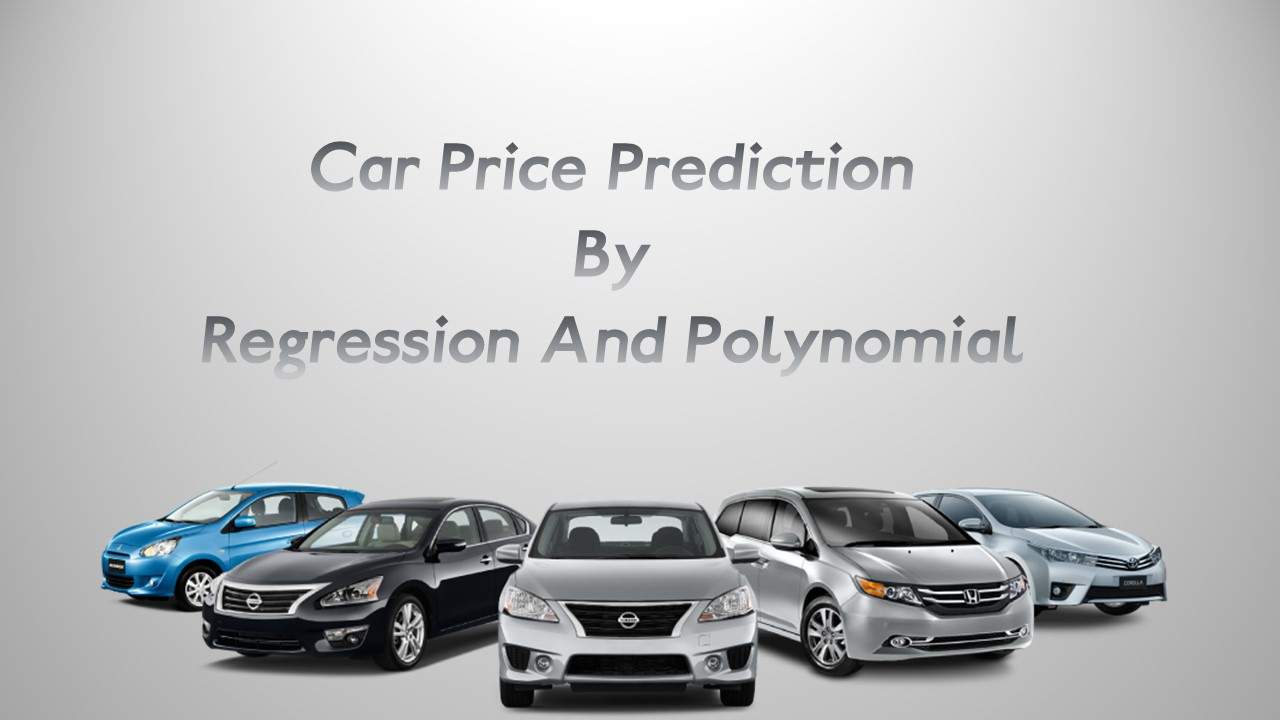


<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 20px; font-family:Times New Roman;font-style:Bold;text-right: center;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:100px; "><b>Problems:<br/></b>
<br/>We want to predict price for new car based on the model we made to analyze the price of previouse cars.</p>




<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 30px; font-family:Times New Roman;font-style:Bold;text-align: center;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:100px; "><b>Step1.Import Libraries</b></p>



In [78]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split , StratifiedKFold ,KFold,cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression as LR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from scipy import stats # to linearity assuption linear regression
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from scipy.special import inv_boxcox
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV



<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 30px; font-family:Times New Roman;font-style:Bold;text-align: center;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:100px; "><b>Step2.Read Dataset</b></p>



In [79]:
data=pd.read_csv('cardata.csv')
data1=pd.DataFrame(data)


<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 30px; font-family:Times New Roman;font-style:Bold;text-align: center;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:100px; "><b>3.Dataset Overview</b></p>



In [80]:
data1.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [81]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB



<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 17px; font-family:Times New Roman;font-style:Bold;text-right: center;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:550px; "><b>| Columns | Description |<br/></b>
<br/> Car_Name : Name of cars<br/><br/> Year : Years of life car <br/><br/><br/>Selling_Price:The price of the car, which is our main goal<br/><br/>Present_Price :The current price of the car<br/><br/><br/> Kms_Driven:kilometers driven	<br/><br/>Fuel_Type:Fuel_Type is on of the (Diesel,Petrol,CNG)<br/><br/><br/>Seller_Type:seller is dealer or individual.<br/><br/>Transmission:Transmission is manual or Automatic.<br/><br/>Owner:it has three values(0,1,3)<br/><br/><br>Selling_Price is dependent variable and <b>target value</b> but rest of the features are independent variables. </p>



In [82]:
data1.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [83]:
data1.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [84]:
data1.shape

(301, 9)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


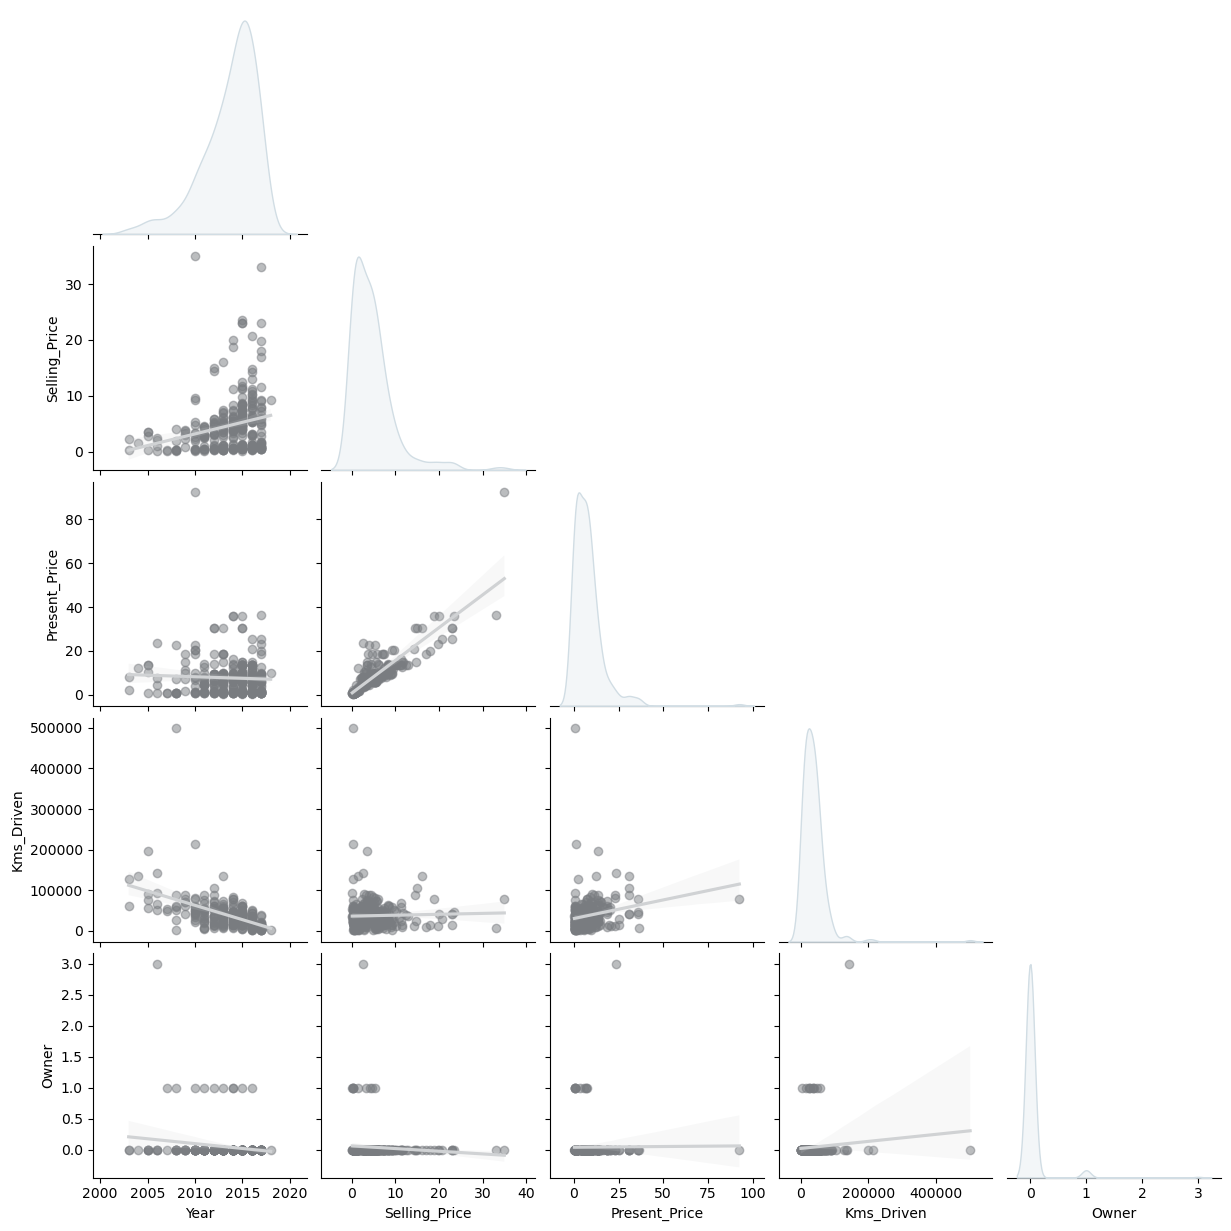

In [85]:
#p=sns.pairplot(data1)
'#D1DDE4'
g = sns.pairplot(data1,
                 kind='reg',
                 diag_kind="kde",
                 plot_kws={'line_kws':{'color':'#D0D2D4'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': '#797C80'}},
                 corner=True,
                 diag_kws= {'color': '#D1DDE4'})



<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 20px; font-family:Times New Roman;font-style:Bold;text-align: center;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:100px; "><b>Numerical Columns</b></p>



In [86]:
data1.describe(include='number')

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000



<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 20px; font-family:Times New Roman;font-style:Bold;text-align: center;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:100px; "><b>Object columns</b></p>



In [87]:
data1.describe(include='object')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261



<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 17px; font-family:Times New Roman;font-style:Bold;text-right: center;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:200px; "><b>Information:<br/></b>
<br/>This dataset contains 300 rows and 8 columns.<br/><br/>It has 8 features such as<br/> Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Fuel_Type,Seller_Type,Transmission,Owner.<br/><br/>It has no missing value.	 </p>



In [88]:
data1['Fuel_Type'].head(5)

0    Petrol
1    Diesel
2    Petrol
3    Petrol
4    Diesel
Name: Fuel_Type, dtype: object

In [89]:
data1['Owner'].head(100)

0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Name: Owner, Length: 100, dtype: int64

In [90]:
data1['Owner'].nunique()

3

In [91]:
data1['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [92]:
data1['Present_Price'].nunique()

147

In [93]:
data1['Car_Name'].nunique()

98

In [94]:
data1['Fuel_Type'].nunique()

3

In [95]:
data1['Seller_Type'].nunique()


2

In [96]:
data1['Transmission'].nunique()

2

In [97]:
data1['Year'].nunique()

16


<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 17px; font-family:Times New Roman;font-style:Bold;text-right: center;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:300px; "><b>Data Analysing:</b>
    <br/>This dataset contains <b>three categorical features.</b><br/><br/>They are:<br/><br/> Fuel_Type,Seller_Type,Transmission,Owner.<br/>
<b><br/>and  Four continuous features:</b><br/><br/>They are:<br/><br/> Year,Selling_Price,Present_Price,Kms_Driven.<br/>
</p>




<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 17px; font-family:Times New Roman;font-style:Bold;text-right: center;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:550px; "><b>| Features | VaLues |<br/></b>
    <br/> Car_Name : This feature has <b>98 name</b> of cars and it is not important to our prediction.<br/><br/> Year : This feature has <b>16 years</b> of built car but we need years of life car to 2018. <br/><br/><br/>Selling_Price:This feature is y or target.<br/><br/>Present_Price :This feature has 147 values.<br/><br/><br/><br/>Fuel_Type:This feature has on of the (Diesel,Petrol,CNG) but CNG is one and not important.<br/><br/><br/>Seller_Type:This feature has two values: dealer or individual.<br/><br/>Transmission:This feature has two values: manual or Automatic.<br/><br/>Owner:This feature hastwo values: has three values(0,1,3)<br/><br/><br>Selling_Price is dependent variable and <b>target value</b> but rest of the features are independent variables. </p>




<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 30px; font-family:Times New Roman;font-style:Bold;text-align: center;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:100px; "><b>Step4.EDA</b></p>




<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 20px; font-family:Times New Roman;font-style:Bold;text-align: center;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:50px; "><b>Plots</b></p>




<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 20px; font-family:Times New Roman;font-style:Bold;text-align: center;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:50px; "><b>Categorical and Continuous Variable:</b></p>



In [98]:
categorical_features=['Fuel_Type','Seller_Type','Transmission','Owner']

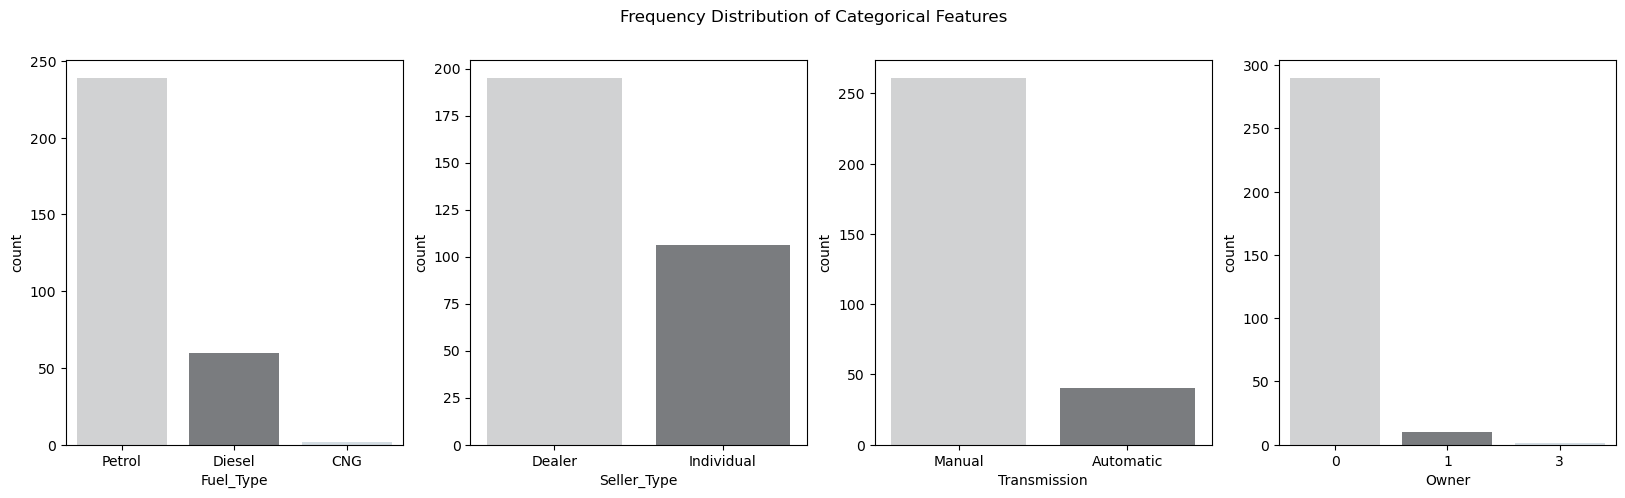

In [99]:
fig,ax=plt.subplots(nrows=1,ncols=4,figsize=(20,5))
colors=['#D0D2D4','#797C80','#D1DDE4']
color_palette=sns.set_palette(sns.color_palette(colors))

for i in range(len(categorical_features)):
    plt_draw=sns.countplot(x=categorical_features[i],data=data1,ax=ax[i])
    plt.suptitle('Frequency Distribution of Categorical Features ')
plt.show()



<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 17px; font-family:Times New Roman;font-style:Bold;text-right: center;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:300px; "><b>Conculsion</b><br/>
    <br/><b>Fuel_Type </b>It has three values:Petrpl,Diesel and CNG.Petrol is highest and CNG is lowest.<br/><br/>
    <br/><b>Seller_Type </b>It has two values:Dealer and Individual.Dealer is highest and Individual is lowest.<br/><br/>
    <br/><b>Transmission </b>It has two values:Manual and Automatic.Manual is highest and Automatic is lowest.<br/><br/>
    <br/><b>Owner </b>It has three values:0,1 and 3.0 is highest and 3 is lowest.<br/><br/>
</p>



In [100]:
Car_life=2018-data['Year']
data.insert(0,'Car_life',Car_life)
data.drop('Year',inplace=True,axis=1)
data.drop('Car_Name',inplace=True,axis=1)
data.head(10)

,Car_life,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,4,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,5,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,1,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,7,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,4,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,0,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,3,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,3,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,2,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,3,7.45,8.92,42367,Diesel,Dealer,Manual,0



<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 20px; font-family:Times New Roman;font-style:Bold;text-align: center;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:50px; "><b>Continuous Variable:</b></p>



In [101]:

continuous_features=['Car_life','Selling_Price','Present_Price','Kms_Driven']

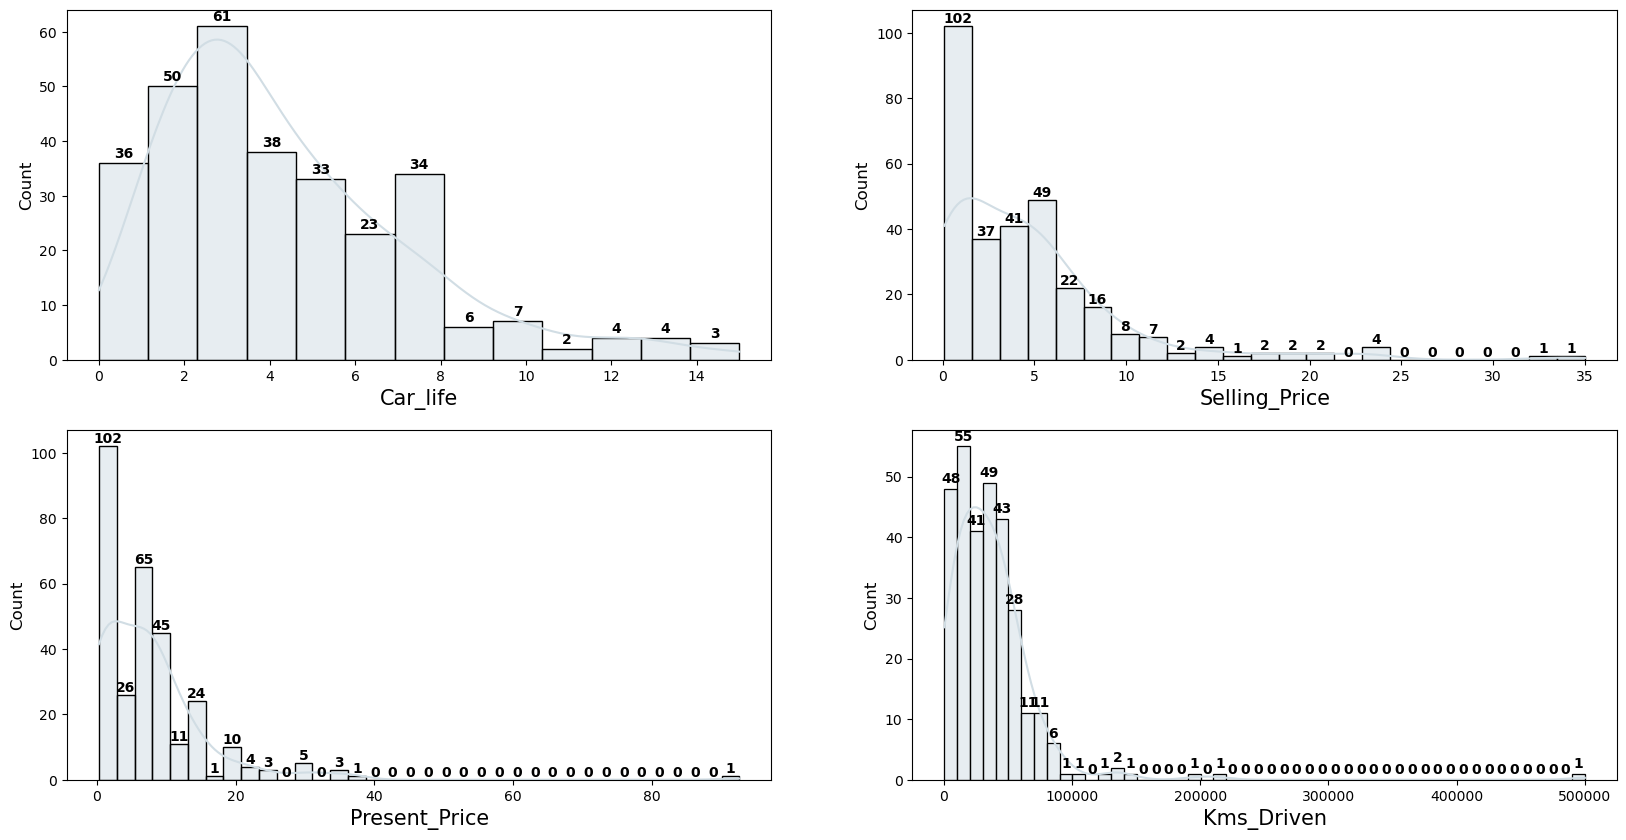

In [102]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(20,10))
colors=['#D1DDE4']

for i in range(len(continuous_features)):
    row=i//2
    col=i%2
    cont_draw=sns.histplot(data=data,x=continuous_features[i],color='#D1DDE4',kde=True,ax=ax[row,col])
    ax[row,col].set_xlabel(continuous_features[i], fontsize=15)
    ax[row,col].set_ylabel('Count', fontsize=12)


    for j,p in enumerate(cont_draw.patches):
        ax[row,col].annotate('{}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+1),
                             ha='center', fontsize=10 ,fontweight="bold")
        
textstr = '\n'.join((
    r'$\mu=%.2f$' %data1[continuous_features[i]].mean(),
    r'$\sigma=%.2f$' %data1[continuous_features[i]].std(),
    r'$\mathrm{median}=%.2f$' %np.median(data1[continuous_features[i]]),
    r'$\mathrm{min}=%.2f$' %data1[continuous_features[i]].min(),
    r'$\mathrm{max}=%.2f$' %data1[continuous_features[i]].max()
    ))
plt.show()

In [103]:

for i in range(len(continuous_features)):
    row=i//2
    col=i%2
    print(col)

0
1
0
1



<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 20px; font-family:Times New Roman;font-style:Bold;text-align: center;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:50px; "><b>Stripplot</b></p>



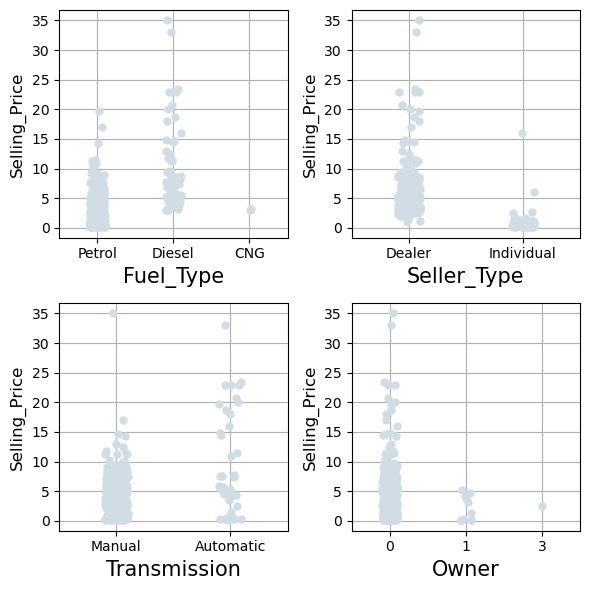

In [104]:
categorical_features=['Fuel_Type','Seller_Type','Transmission','Owner']
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(6,6))
colors=['#D1DDE4']

for i,feature in enumerate(categorical_features):
    row=i//2
    col=i%2
    sns.stripplot(ax=ax[row,col],data=data,x=feature,color='#D1DDE4',y='Selling_Price',size=6)
    ax[row,col].set_xlabel(categorical_features[i], fontsize=15)
    ax[row,col].set_ylabel('Selling_Price', fontsize=12)
    ax[row,col].grid()
plt.tight_layout()

plt.show()
    

for j,p in enumerate(cont_draw.patches):
        ax[row,col].annotate('{}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+1),
                             ha='center', fontsize=10 ,fontweight="bold")


<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 20px; font-family:Times New Roman;font-style:Bold;text-align: center;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:50px; "><b>Regplot for Continuous Variables:</b></p>



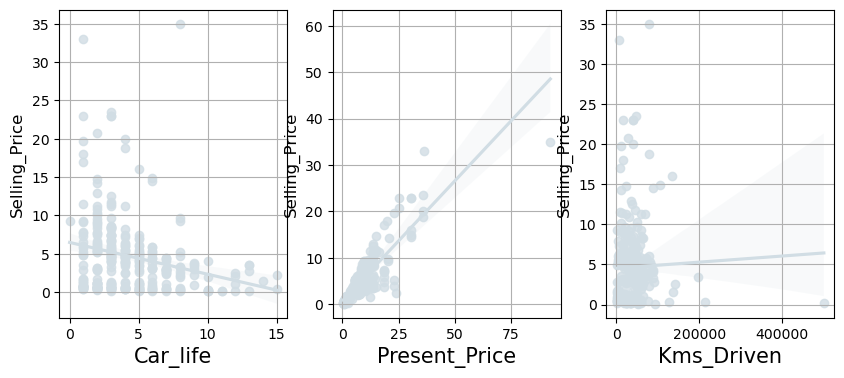

In [105]:
continuous_features=['Car_life','Present_Price','Kms_Driven']
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(10,4))
colors=['#D1DDE4']

for i in range(len(continuous_features)):
    
    sns.regplot(ax=ax[i],data=data,x=continuous_features[i],color='#D1DDE4',y='Selling_Price')
    ax[i].set_xlabel(continuous_features[i], fontsize=15)
    ax[i].set_ylabel('Selling_Price', fontsize=12)
    ax[i].grid()
plt.show()
    

for j,p in enumerate(cont_draw.patches):
        ax[i].annotate('{}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+1),
                             ha='center', fontsize=10 ,fontweight="bold")


<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 20px; font-family:Times New Roman;font-style:Bold;text-align: center;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:50px; "><b>Scatterplot for Continuous Variables:</b></p>



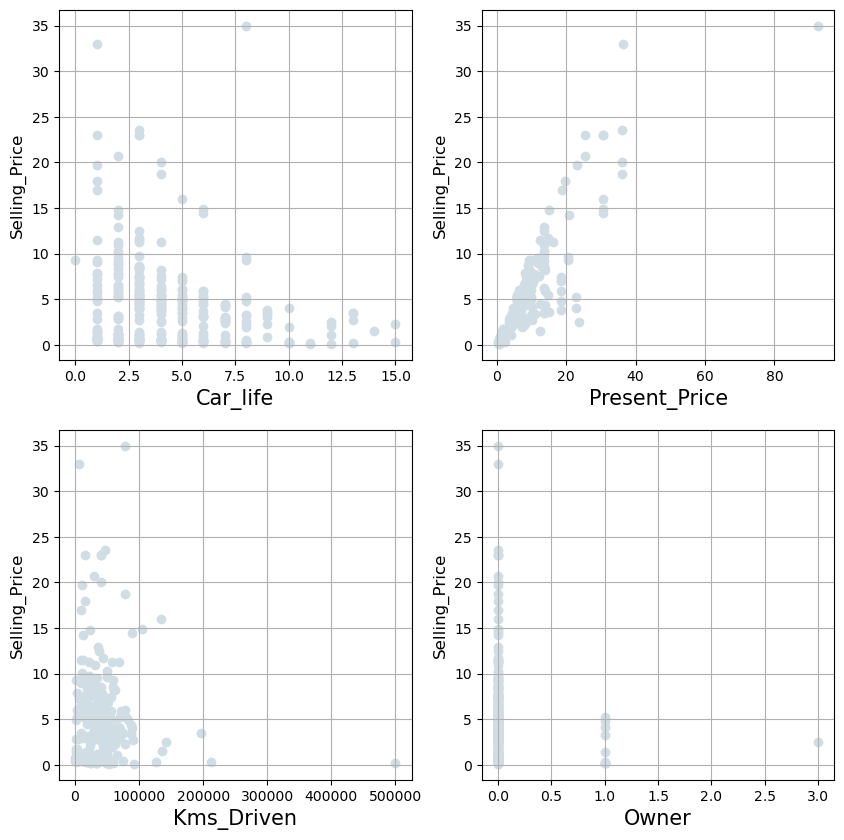

In [106]:
continuous_features=['Car_life','Present_Price','Kms_Driven','Owner']

fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(10,10))
colors=['#D1DDE4']

for i in range(len(continuous_features)):
    row=i//2
    col=i%2
    ax[row,col].scatter(data[continuous_features[i]],data['Selling_Price'],color='#D1DDE4')
    ax[row,col].set_xlabel(continuous_features[i], fontsize=15)
    ax[row,col].set_ylabel('Selling_Price', fontsize=12)
    ax[row,col].grid()
plt.show()
    

for j,p in enumerate(cont_draw.patches):
        ax[row,col].annotate('{}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+1),
                             ha='center', fontsize=10 ,fontweight="bold")

<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 16px; font-family:Times New Roman;font-style:Bold;text-align: left;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:250px; "><b>Conclusion:</b>
<br/>As Present_Price increases, Selling_Price increases as well. So Selling_Price is directly proportional to Present_Price.<br/><br/>As the car's Kms_Driven increases, its Selling_Price decreases. So Selling_Price is inversely proportional to Kms_Driven.<br/><br/>As the car life, its Selling_Price decreases. So Selling_Price is inversely proportional to the life of the car.<br/><br/>As the number of previous car owners increases, its Selling_Price decreases. So Selling_Price is inversely proportional to Owner.</p>


<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 20px; font-family:Times New Roman;font-style:Bold;text-align: center;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:50px; "><b>Categorical Variables Encoding:</b></p>




<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 20px; font-family:Times New Roman;font-style:Bold;text-align: center;border:15px;border-radius:10px 10px; padding:30px ;width: 900px;height:50px; "><b>Multivariate Variate Analysis:</b></p>



In [107]:
categorical_features=['Fuel_Type','Seller_Type','Transmission']

data1 = pd.get_dummies(data, columns=categorical_features, drop_first=True)
data1 = data1.astype(int)

data1.head(12)

,Car_life,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,4,3,5,27000,0,0,1,0,1
1,5,4,9,43000,0,1,0,0,1
2,1,7,9,6900,0,0,1,0,1
3,7,2,4,5200,0,0,1,0,1
4,4,4,6,42450,0,1,0,0,1
5,0,9,9,2071,0,1,0,0,1
6,3,6,8,18796,0,0,1,0,1
7,3,6,8,33429,0,1,0,0,1
8,2,8,8,20273,0,1,0,0,1
9,3,7,8,42367,0,1,0,0,1


In [108]:
#data1.drop('Car_Name',inplace=True,axis=1)
data1.head(20)

,Car_life,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,4,3,5,27000,0,0,1,0,1
1,5,4,9,43000,0,1,0,0,1
2,1,7,9,6900,0,0,1,0,1
3,7,2,4,5200,0,0,1,0,1
4,4,4,6,42450,0,1,0,0,1
5,0,9,9,2071,0,1,0,0,1
6,3,6,8,18796,0,0,1,0,1
7,3,6,8,33429,0,1,0,0,1
8,2,8,8,20273,0,1,0,0,1
9,3,7,8,42367,0,1,0,0,1


<Axes: >

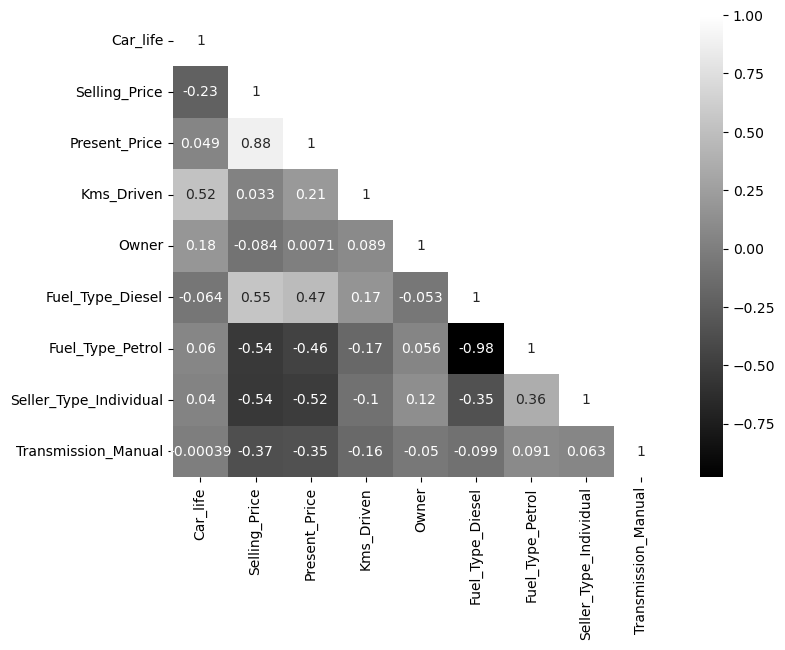

In [109]:
corr = data1.corr(method='pearson')     
fig, ax = plt.subplots(figsize=(8, 6))

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True
sns.heatmap(corr, cmap='gray' , mask=mask ,annot=True, ax=ax)


<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 16px; font-family:Times New Roman;font-style:Bold;text-align: left;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:500px; "><b>Conclusion:</b>
<br/>As Present_Price increases, Selling_Price increases as well. So Selling_Price is directly proportional to Present_Price.<br/><br/>As the car's Kms_Driven increases, its Selling_Price decreases. So Selling_Price is inversely proportional to Kms_Driven.<br/><br/>As the car life, its Selling_Price decreases. So Selling_Price is inversely proportional to the life of the car.<br/><br/>As the number of previous car owners increases, its Selling_Price decreases. So Selling_Price is inversely proportional to Owner.<br/><br/>Selling_Price and Present_Price-----Most correlation<br/><br/>Fuel_Type_Diesel  and  Selling_Price--------Middle Correlation<br/><br/>Kms_Driven and Car_Life-------Middle Correlation<br/><br/>Fuel_Type_Diesel  and Present_Price-----Middle Correlation<br/><br/>Seller_Type_individual and >Fuel_Type_Diesel -------inverse low Correlation<br/><br/>Kms_Driven and Present_Price-----inverse low Correlation</p>


<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 20px; font-family:Times New Roman;font-style:Bold;text-align: center;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:50px; "><b>Multivariate Variate Plots:</b></p>



C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


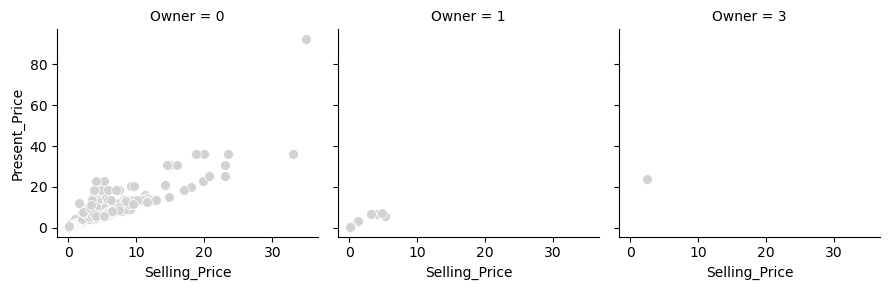

In [110]:
    multi=sns.FacetGrid(data,col='Owner',palette='Blues')
    multi.map(sns.scatterplot,'Selling_Price','Present_Price',s=50)
    multi.set_axis_labels(x='Selling_Price',y='Present_Price')
    plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


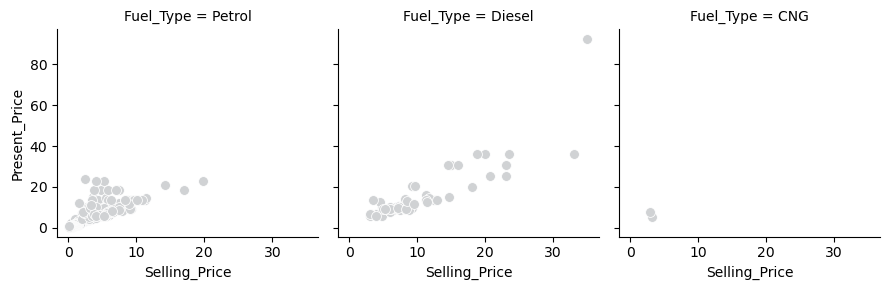

In [111]:
    multi=sns.FacetGrid(data,col='Fuel_Type',palette='Blues')
    multi.map(sns.scatterplot,'Selling_Price','Present_Price',s=50)
    multi.set_axis_labels(x='Selling_Price',y='Present_Price')
    plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


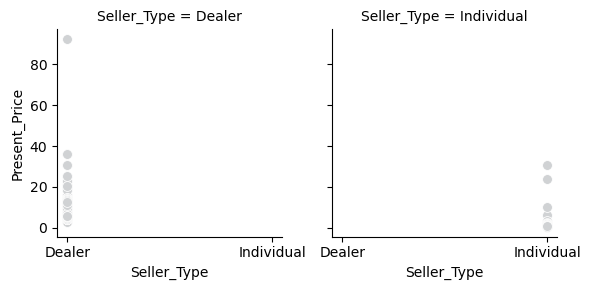

In [112]:
multi=sns.FacetGrid(data,col='Seller_Type',palette='Blues')
multi.map(sns.scatterplot,'Seller_Type','Present_Price',s=50)
multi.set_axis_labels(x='Selling_Price',y='Selling_Price')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


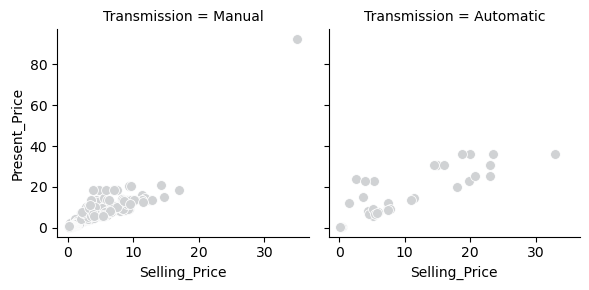

In [113]:
multi=sns.FacetGrid(data,col='Transmission',palette='Blues')
multi.map(sns.scatterplot,'Selling_Price','Present_Price',s=50)
multi.set_axis_labels(x='Selling_Price',y='Present_Price')
plt.show()


<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 30px; font-family:Times New Roman;font-style:Bold;text-align: center;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:100px; "><b>Step5.Irrelevant Feature Removal</b></p>



Since Car_Name contains 98 unique categories, and this number of categories is very high compared to the number of dataset samples, it is better to drop it:

In [114]:
data1=data1.drop(['Fuel_Type_Diesel'],axis=1)

In [115]:
data1.head()

,Car_life,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,4,3,5,27000,0,1,0,1
1,5,4,9,43000,0,0,0,1
2,1,7,9,6900,0,1,0,1
3,7,2,4,5200,0,1,0,1
4,4,4,6,42450,0,0,0,1



<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 30px; font-family:Times New Roman;font-style:Bold;text-align: center;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:100px; "><b>Noise and Outlier</b></p>



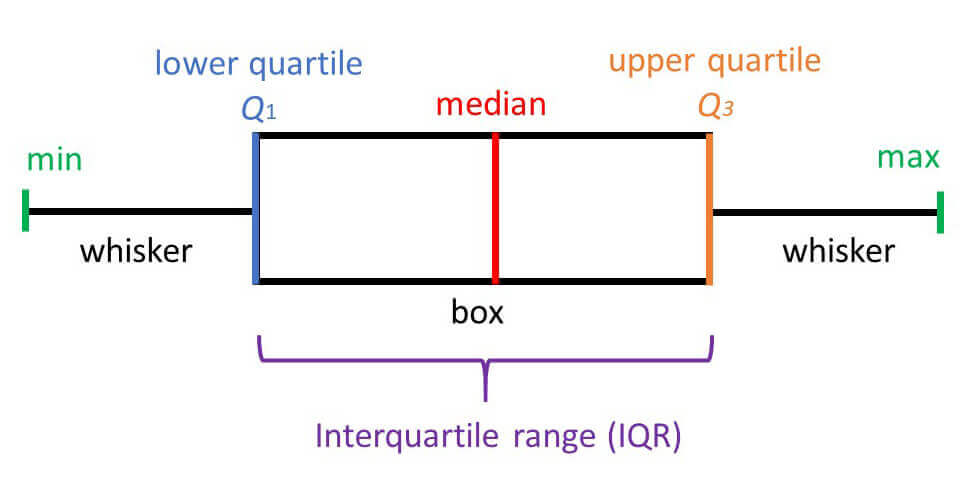

In [116]:
data1.columns

Index(['Car_life', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

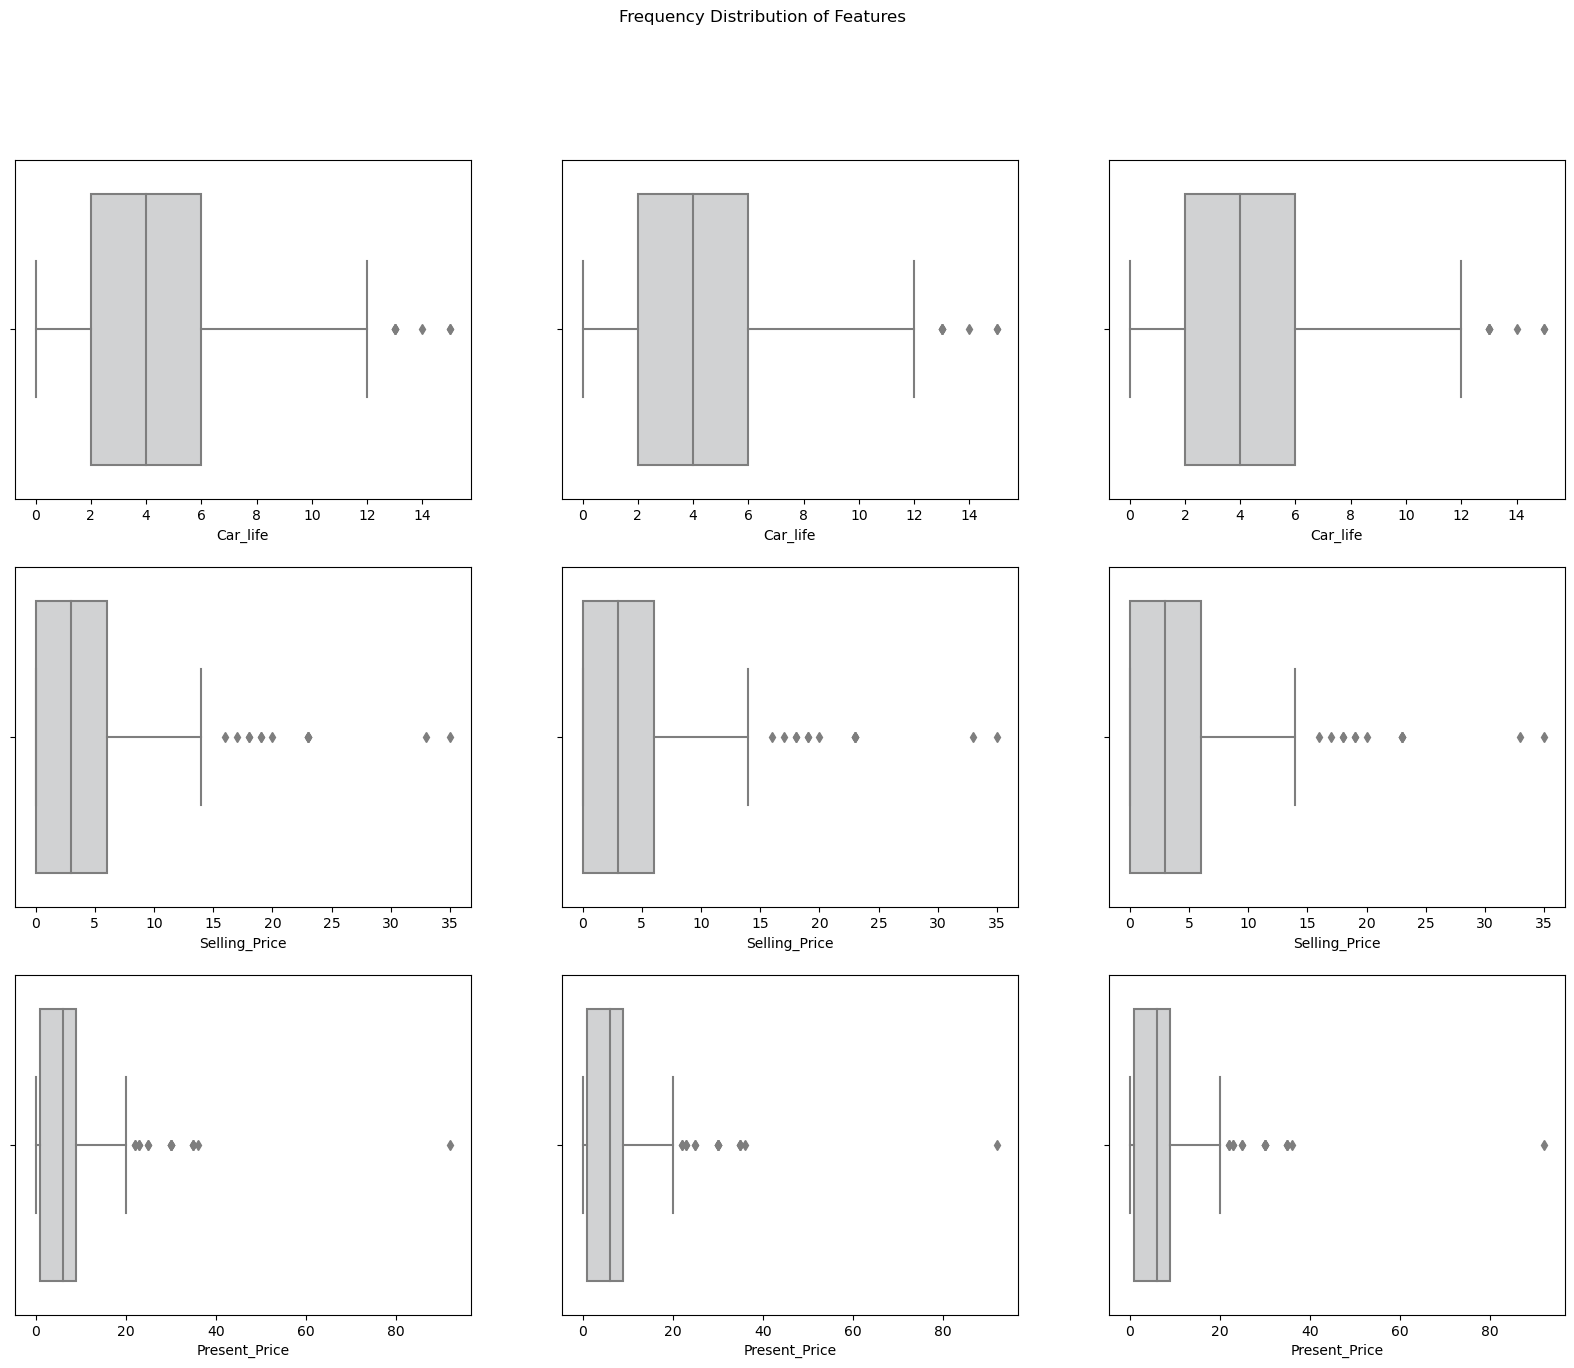

In [117]:
nrows=3
ncols=3
fig,ax=plt.subplots(nrows,ncols,figsize=(20,15))
colors=['#D0D2D4','#797C80','#D1DDE4']
sns.set_palette(sns.color_palette(colors))

for i in range(nrows):
    for j in range(ncols):
        sns.boxplot(x=data1.columns[i],data=data1,ax=ax[i, j])
        plt.suptitle('Frequency Distribution of Features ')
       
        
plt.show()

In [118]:
X=data1.drop('Selling_Price',axis=1)
y=data1['Selling_Price']

In [119]:
X.shape

(301, 7)

In [120]:
y.shape

(301,)

In [121]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [122]:
print ('Shape of X_train:',X_train.shape)
print ('Shape of Y_train:',Y_train.shape)
print ('Shape of X_test:',X_test.shape)
print ('Shape of Y_test:',Y_test.shape)

Shape of X_train: (225, 7)
Shape of Y_train: (225,)
Shape of X_test: (76, 7)
Shape of Y_test: (76,)



<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 30px; font-family:Times New Roman;font-style:Bold;text-align: center;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:100px; "><b>Standard Scaler</b></p>



In [123]:
Scale_change=StandardScaler()
Scale_change.fit(X_train)
X_train_new_scale=Scale_change.transform(X_train)
X_test_new_scale=Scale_change.transform(X_test)


<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 30px; font-family:Times New Roman;font-style:Bold;text-align: center;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:50px; "><b>Step 7:Model Evaluation using Cross Validation</b></p>

In [124]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression


# Generate example data
X=data1.drop('Selling_Price',axis=1)
y=data1['Selling_Price']



# Create a linear regression model
model = LinearRegression()

# Create a 6-fold cross-validation
kf = KFold(n_splits=6, shuffle=True, random_state=0)

# Perform cross-validation and calculate MSE
mse_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')



# Convert negative MSE to positive
mse_scores = -mse_scores
mse_scores = -mse_scores

# Calculate mean and standard deviation of MSE
mse_mean = mse_scores.mean()
mse_std = mse_scores.std()

print("\nMean Squared Error (MSE) scores:", mse_scores)
print("Mean MSE:", mse_mean)
print("MSE Standard Deviation:", mse_std)
# Print the R2 scores for each fold
print("\nR2 scores for each fold:", r2_scores)

# Print the R2 scores for each fold
print("R2 scores for each fold:", r2_scores)

# Calculate the average R2 score
average_r2_score = r2_scores.mean()
print("Average R2 score:", average_r2_score)



# Perform cross-validation and calculate MAE
mae_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Convert the negative MAE scores to positive values
mae_scores = -mae_scores

# Print the MAE scores for each fold
print("\nMAE scores for each fold:", mae_scores)

# Calculate the average MAE score




Mean Squared Error (MSE) scores: [-2.4518035  -5.99325949 -2.26773508 -8.32170717 -5.2820667  -1.9465095 ]
Mean MSE: -4.377180238609348
MSE Standard Deviation: 2.347154980480181

R2 scores for each fold: [0.88686995 0.82697643 0.84094553 0.82648651 0.7176211  0.87279711]
R2 scores for each fold: [0.88686995 0.82697643 0.84094553 0.82648651 0.7176211  0.87279711]
Average R2 score: 0.8286161047869576

MAE scores for each fold: [1.11640791 1.43515324 1.2034912  1.71185307 1.42903813 1.09837494]


In [125]:
data1.head()

,Car_life,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,4,3,5,27000,0,1,0,1
1,5,4,9,43000,0,0,0,1
2,1,7,9,6900,0,1,0,1
3,7,2,4,5200,0,1,0,1
4,4,4,6,42450,0,0,0,1


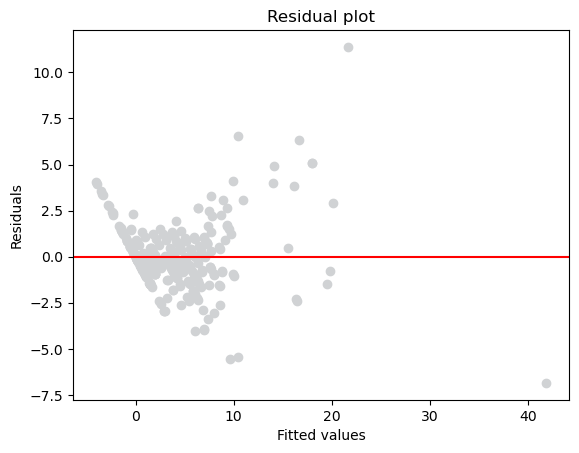

In [126]:

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Calculate residuals
residuals = y - model.predict(X)

# Create residual plot
plt.scatter(model.predict(X), residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()



<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 20px; font-family:Times New Roman;font-style:Bold;text-align: center;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:50px; "><b>ِAssumption</b></p>




<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 20px; font-family:Times New Roman;font-style:Bold;text-align: center;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:150px; "><b>ِMean of Residuals</b><br/>Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero.</p>





<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 20px; font-family:Times New Roman;font-style:Bold;text-align: center;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:50px; "><b>ِPlot from y pred and y actual</b></p>



In [127]:

def residuals(model, X_test, y_test):
    '''
    #Creates predictions on the features with the model and calculates residuals
    '''
    y_pred = model.predict(X_test)
    df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results


In [128]:
residuals(reg1, X_test_new_scale,Y_test)


,Actual,Predicted,Residuals
223,8,6.868670,1.131330
150,0,-0.780633,-0.780633
226,5,3.806226,1.193774
296,9,8.207939,0.792061
52,18,13.219332,4.780668
...,...,...,...
46,2,2.458713,-0.458713
158,0,1.358973,-1.358973
230,6,6.238214,-0.238214
179,0,-1.826443,-1.826443



<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 20px; font-family:Times New Roman;font-style:Bold;text-align: center;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:50px; "><b>ِAssumption 1:Linearity</b></p>



In [129]:

# Separate independent and dependent variables
X=data1.drop('Selling_Price',axis=1)
y=data1['Selling_Price']


In [130]:
def linear_assumption(model, X_test, y_test):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model
    '''
    df_results = residuals(model, X_test, y_test)
    
    fig, ax = plt.subplots(1,2, figsize=(10,6))
    sns.regplot(x='Predicted', y='Actual', data=df_results, lowess=True, ax=ax[0],
                color='#797C80', line_kws={'color':'#797C80','ls':'--','lw':2.5})
    ax[0].set_title('Actual vs. Predicted Values', fontsize=15)
    ax[0].set_xlabel('Predicted', fontsize=12)
    ax[0].set_ylabel('Actual', fontsize=12)        
    
    sns.regplot(x='Predicted', y='Residuals', data=df_results, lowess=True, ax=ax[1],
                color='#B2BFC8', line_kws={'color':'#B2BFC8','ls':'--','lw':2.5})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=15)
    ax[1].set_xlabel('Predicted', fontsize=12)
    ax[1].set_ylabel('Residuals', fontsize=12)  

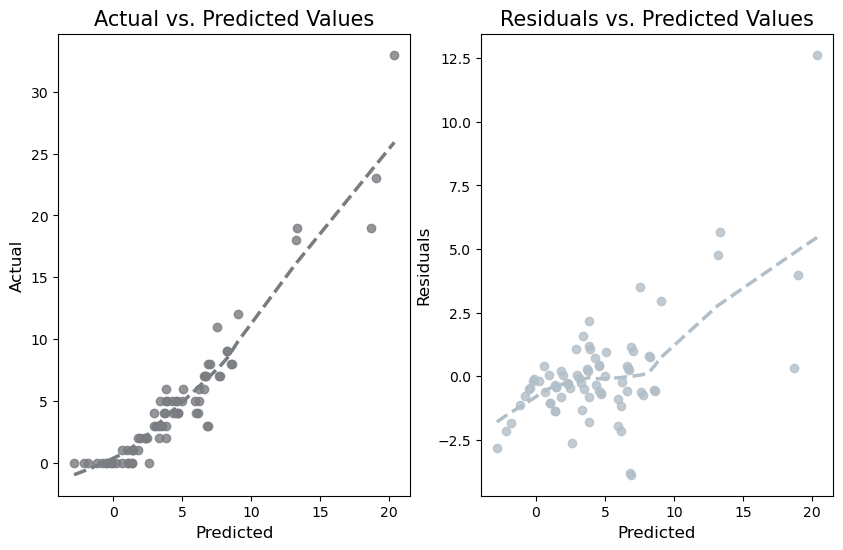

In [131]:
linear_assumption(reg1, X_test_new_scale,Y_test)


<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 20px; font-family:Times New Roman;font-style:Bold;text-align: center;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:50px; "><b>ِAssumption 2:Normality<br/></b>


<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 20px; font-family:Times New Roman;font-style:Bold;text-align: left;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:250px; ">Normality assumption in regression is one of the fundamental assumptions of this statistical method. <br/>According to this assumption, the distribution of the residuals of the regression model should be normal.<br/> This assumption is essential to ensure the accuracy and validity of the regression results.<br/>In Python, to test the normality assumption of the residuals, various statistical tests can be used. Among these tests, the Shapiro-Wilk test and the Jarque-Bera test can be mentioned.<br/>If the results of these tests indicate that the distribution of the residuals is not normal, different methods can be used to address this issue. These methods include data transformation, using non-linear regression models, or using robust regression methods.</p>

In [132]:

def normality_assumption_check(model, X_test, y_test, p_value_thresh=0.05):
    """
    Checks the normality assumption of the residuals for a linear regression model.

    Args:
        model (sklearn.linear_model.LinearRegression): The fitted linear regression model.
        X_test (test segment in dataset data1): The test data.
        y_test (y_test of data1): The target values for the test data.
        p_value_thresh (float): The p-value threshold for rejecting the normality assumption.

    Returns:
        bool: True if the normality assumption is not rejected, False otherwise.
    """
    # Calculate residuals
    df_results = residuals(model, X_test, y_test)
    
    # Perform Anderson-Darling test
    p_value = normal_ad(df_results['Residuals'])[1]
    
    # Check if the p-value is greater than the threshol
    print('\nP-value from the test (below 0.05 generally means non-normal):  ', np.round(p_value,6))
 
    # Check the normality assumption
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed. Assumption not satisfied.') 
    else:
        print('Residuals are normally distributed. Assumption satisfied.')

      
    # Plot the residuals
    fig, ax = plt.subplots(1,2, figsize=(15,6), dpi=80)
    
    sns.histplot(data=df_results, x='Residuals', kde=True, ax=ax[0], bins=15, 
                 color='#B2BFC8', edgecolor='none', alpha=0.4, line_kws={'lw': 2.5})
    ax[0].set_xlabel('Residuals', fontsize=12)
    ax[0].set_ylabel('Count', fontsize=12)
    ax[0].set_title('Distribution of Residuals', fontsize=15)
    textstr = '\n'.join((
        r'$\mu=%.2f$' %np.mean(df_results['Residuals']),
        r'$\sigma=%.2f$' %np.std(df_results['Residuals']),
        ))
    ax[0].text(0.7, 0.9, textstr, transform=ax[0].transAxes, fontsize=15, verticalalignment='top',
                 bbox=dict(boxstyle='round',facecolor='#B2BFC8', edgecolor='black', pad=0.5))
    
    
    # Q-Q Plot
    stats.probplot(df_results['Residuals'], dist="norm", plot= ax[1])
    ax[1].set_title("Residuals Q-Q Plot", fontsize=15)
    ax[1].set_xlabel('Theoretical Quantiles', fontsize=12)
    ax[1].set_ylabel('Ordered Values', fontsize=12)
    ax[1].get_lines()[0].set_markerfacecolor('#B2BFC8')
    ax[1].get_lines()[1].set_color('black')
    ax[1].get_lines()[1].set_linewidth(2.5)
    ax[1].get_lines()[1].set_linestyle('--')
    ax[1].legend(['Actual','Theoretical'])
    
plt.show()

In [ ]:
normality_assumption_check(reg1, X_test_new_scale,Y_test)

<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 20px; font-family:Times New Roman;font-style:Bold;text-align: left;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:350px; "><br/>In the above command, p_value_thresh=0.05 is a threshold value for the p-value test. If the p-value test is less than the threshold value, the null hypothesis that the residuals are normal is rejected. The threshold value is usually 0.05 or 0.01.<br/><br/><br/>In this code, the threshold value is set to 0.05. This means that if the p-value of the test is less than 0.05, it is assumed that the residuals are not normal.<br/><br/><br/>For example, if the p-value of the test is 0.04, the hypothesis is null and we conclude that the residuals are not normal. In this case, methods such as data transformation or the use of non-linear regression models can be used to solve this problem.</p>

<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 20px; font-family:Times New Roman;font-style:Bold;text-align: center;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:50px; "><b>ِAssumption 3:No Multicollinearity<br/></b>

<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 20px; font-family:Times New Roman;font-style:Bold;text-align: left;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:350px; ">The hypothesis of non-collinearity in regression is a hypothesis that states that changes in a regression model are not correlated with composition. This hypothesis is needed to ensure the accuracy and validity of the results of the regression model.<br/>In the presence of explanatory variables, the estimates of the regression estimators may be affected and their precision. For example, if two explanations have high multiple correlations, regression estimators may accurately test each of these variables based on the measurement variables.<br/>The hypothesis of non-collinearity can be checked using methods. One of these methods is the use of the variance inflation index (VIF). For each explanation, the VIF explains the variance of that variable to its variance in the absence of correlation with other variables. If an explanatory variable's VIF is greater than 10, it indicates collinearity between that variable and other explanatory variables.<br/>If there is collinearity in the regression model, I can use practical methods to fix it. One of these methods is to remove one of the co-linear explanatory methods. Another method is to use robust regression methods. Resistive resistance methods are affected by collinearity.<p/>



<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 20px; font-family:Times New Roman;font-style:Bold;text-align: left;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:150px; ">If the predictor variables are correlated among themselves, then the data is said to have a multicollinearity problem. But why is this a problem? The answer to this question is that high collinearity means that the two variables vary very similarly and contain the same kind of information. This will leads to redundancy in the dataset. Due to redundancy, only the complexity of the model increase, and no new information or pattern is learned by the model. We generally try to avoid highly correlated features even while using complex models.<br/>

<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 20px; font-family:Times New Roman;font-style:Bold;text-align: left;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:150px; ">To detect multicolinearity, we can:<br/><br/>Use a heatmap of the correlation (step 4)
<br/>Examine the variance inflation factor (VIF)<p/>

In [133]:
X = data1.drop('Selling_Price', axis=1)
y = data1['Selling_Price']
def multicollinearity_assumption(X):
    ''''
    This assumes that predictors are not correlated with each other and calculates VIF values of predictors
    '''
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    possible_multicollinearity = sum([1 for v in vif if v > 10])
    definite_multicollinearity = sum([1 for v in vif if v > 100])
    
    print('{} cases of possible multicollinearity.'.format(possible_multicollinearity))
    print('{} cases of definite multicollinearity.'.format(definite_multicollinearity))
    
    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied.')
        else:
            print('Assumption possibly satisfied.')
    else:
        print('Assumption not satisfied.')
    
    return pd.DataFrame({'vif': vif}, index=X.columns).round(2)


In [134]:
multicollinearity_assumption(X)

0 cases of possible multicollinearity.
0 cases of definite multicollinearity.
Assumption satisfied.


,vif
Car_life,4.84
Present_Price,1.78
Kms_Driven,0.00
Owner,1.09
Fuel_Type_Petrol,4.54
Seller_Type_Individual,2.06
Transmission_Manual,4.34


<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 16px; font-family:Times New Roman;font-style:Bold;text-align:left;border:15px;border-radius:10px 10px; padding:30px ;width: 900px;height:50px; ">There is no VIF is greater than 10 in , it indicates no collinearity is between all variables.</p>


<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 20px; font-family:Times New Roman;font-style:Bold;text-align: center;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:50px; "><b>ِAssumption 4:Durbin-Watson<br/></b>

<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 15px; font-family:Times New Roman;font-style:Bold;text-align: left;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:200px; ">In the field of machine learning, the Durbin-Watson test is often used to check for autocorrelation in the residual data of a regression model. If the residual data has autocorrelation, it can negatively affect the regression results.<br/>In Python, the Durbin-Watson test can be performed using the durbin_watson() function from the statsmodels.stats.stattools library. <br/>This function returns a number between 0 and 4, which is interpreted as follows:<br/>Value < 1.5: There is no autocorrelation.<br/>Value between  1.5  and 2.5: there is positive autocorrelation.
<br/>A value > 2.5 : there is negative autocorrelation.

In [135]:
def autocorrelation_assumption(model, X_test, y_test):
    '''
    It assumes that there is no autocorrelation in the residuals. If there is autocorrelation, then 
    there is a pattern that is not explained because the current value is dependent on the previous value.
    '''
    df_results = residuals(model, X_test, y_test)

    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', round(durbinWatson,3))
    
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation. Assumption not satisfied.', '\n')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation. Assumption not satisfied.', '\n')
    else:
        print('Little to no autocorrelation. Assumption satisfied.', '\n')

In [136]:
autocorrelation_assumption(model,X_test_new_scale, Y_test)


Durbin-Watson: 1.677
Little to no autocorrelation. Assumption satisfied. 



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [137]:
def homoscedasticity_assumption(model, X_test, y_test):
    """
    Homoscedasticity assumes that the residuals exhibit constant variance
    """
    print('The gray line should be flat:')
    df_results = residuals(model, X_test, y_test)
    
    fig = plt.figure(figsize=(6,6), dpi=80)
    sns.regplot(x='Predicted', y='Residuals', data=df_results, lowess=True,
                color='#181C1E', line_kws={'color':'#7A7D80','ls':'--','lw':2.5})
    plt.axhline(y=0, color='#819099', lw=1)
    plt.title('Residuals vs. Predicted Values', fontsize=15)
    plt.xlabel('Predicted Values', fontsize=12)
    plt.ylabel('Residuals', fontsize=12)    
    plt.show()

The gray line should be flat:


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


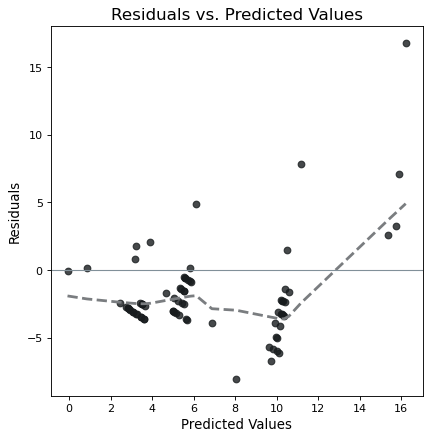

In [138]:
homoscedasticity_assumption(model,X_test_new_scale, Y_test)

<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 16px; font-family:Times New Roman;font-style:Bold;text-align:left;border:15px;border-radius:10px 10px; padding:30px ;width: 900px;height:50px; ">We can not see a fully uniform variance across our residuals because the orange line is not flat. The assumption is not satisfied.</p>


<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 20px; font-family:Times New Roman;font-style:Bold;text-align: center;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:50px; "><b>ِTarget Values vs Predected Values of Test Data in Plot<br/></b>

In [139]:
y_test_pred = model.predict(X_test_new_scale)
df_of_ys = pd.DataFrame({'Actual':Y_test, 'Predicted':y_test_pred})

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [140]:
def compare_plot(df_of_ys):
    df_of_ys.reset_index(inplace=True)
    df_of_ys.plot(y=['Actual','Predicted'], kind='bar', figsize=(20,7), width=0.8)
    plt.title('Predicted vs. Actual Target Values for Test Data', fontsize=20)
    plt.ylabel('Selling_Price', fontsize=15)
    plt.show()

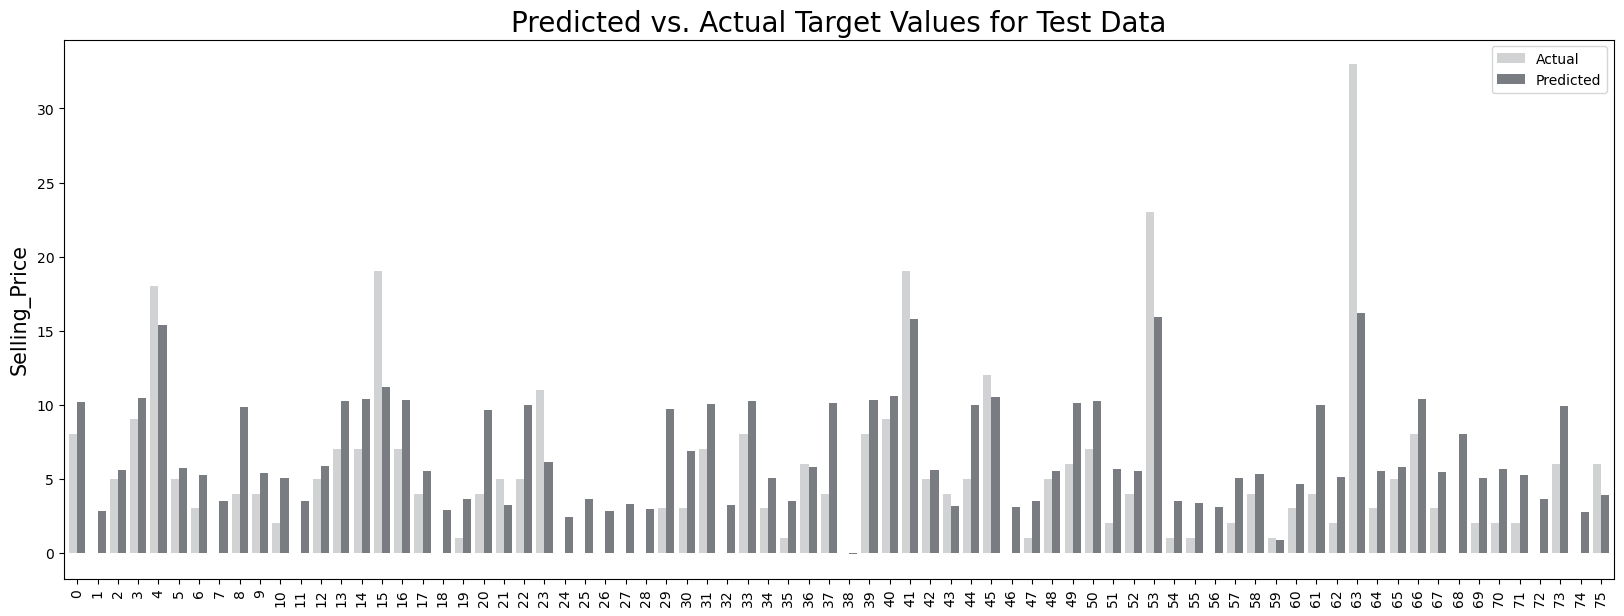

In [141]:
compare_plot(df_of_ys)

<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 16px; font-family:Times New Roman;font-style:Bold;text-align:left;border:15px;border-radius:10px 10px; padding:30px ;width: 900px;height:50px; ">In 75 test data,we don't have any negative prediction.</p>


Apply Box-Cox Transformation

<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 16px; font-family:Times New Roman;font-style:Bold;text-align:left;border:15px;border-radius:10px 10px; padding:30px ;width: 900px;height:130px; ">A Box-Cox dataset is a dataset that has been transformed using a Box-Cox transformation. The Box-Cox transformation is a family of power transformations that can be used to transform non-normal data into more normal data. This can be useful for a variety of statistical procedures, such as linear regression and time series analysis.<br/>The provided code snippet implements a Box-Cox transformation on the y_train (target variable) and X_train (features) data frames, followed by storing the transformation parameters in a fitted_lambda Series.<p/>

In [142]:
#Creating an empty fitted_lambda Series:

fitted_lambda = pd.Series(np.zeros(len(data1.columns), dtype=np.float64), index=data1.columns)

y_train, fitted_lambda['Selling_Price'] = stats.boxcox(Y_train+1)
for col in X_train.columns:
    X_train[col], fitted_lambda[col] = stats.boxcox(X_train[col]+1)
    
fitted_lambda


Car_life                  -0.099999
Selling_Price             -0.018887
Present_Price              0.096324
Kms_Driven                 0.241360
Owner                    -46.372342
Fuel_Type_Petrol           7.305844
Seller_Type_Individual    -2.370023
Transmission_Manual       11.998009
dtype: float64

<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 16px; font-family:Times New Roman;font-style:Bold;text-align:left;border:15px;border-radius:10px 10px; padding:30px ;width: 900px;height:130px; ">In summary, the code performs a Box-Cox transformation on both the target variable (y_train) and features (X_train), storing the transformation parameters (lambda) in the fitted_lambda Series. This can be useful for normalizing non-normal data and improving the performance of statistical models.<p/>


<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 30px; font-family:Times New Roman;font-style:Bold;text-align: center;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:100px; "><b>Step9.Implement Linear Regression</b></p>



In [143]:
reg1=LR()
reg1.fit(X_train_new_scale,Y_train)

LinearRegression()

In [144]:
Y_pred=reg1.predict(X_test_new_scale)
MAE=mean_absolute_error(Y_test,Y_pred)
MSE=mean_squared_error(Y_test,Y_pred)
R2_Score=r2_score(Y_test,Y_pred)

In [145]:
print('\nmean_absolute_error is:',MAE)
print('\nmean_squared_error is:',MSE)
print('\n           R2_score is:',R2_Score)


mean_absolute_error is: 1.2512141764946112

mean_squared_error is: 4.627447944363486

           R2_score is: 0.8558321682957373


<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 20px; font-family:Times New Roman;font-style:Bold;text-align: center;border:15px;border-radius:10px 10px; padding:30px ;width: 900px;height:50px; "><b>Step 10:Second Order Polynomial</b></p>

<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 16px; font-family:Times New Roman;font-style:Bold;text-align:center;border:15px;border-radius:10px 10px; padding:30px ;width: 900px;height:50px; ">Here we want to use the second order features technique to overcome the fit.</p>

In [147]:
Poly_Feature=PolynomialFeatures(degree=2,include_bias=False)
X_Poly=Poly_Feature.fit_transform(X)
# observation new features based on second order polynomial
X_Poly=pd.DataFrame(X_Poly,columns=Poly_Feature.get_feature_names_out(X.columns))
X_Poly.head(15)

,Car_life,Present_Price,Kms_Driven,Owner,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Car_life^2,Car_life Present_Price,Car_life Kms_Driven,...,Owner^2,Owner Fuel_Type_Petrol,Owner Seller_Type_Individual,Owner Transmission_Manual,Fuel_Type_Petrol^2,Fuel_Type_Petrol Seller_Type_Individual,Fuel_Type_Petrol Transmission_Manual,Seller_Type_Individual^2,Seller_Type_Individual Transmission_Manual,Transmission_Manual^2
0,4.0,5.0,27000.0,0.0,1.0,0.0,1.0,16.0,20.0,108000.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,5.0,9.0,43000.0,0.0,0.0,0.0,1.0,25.0,45.0,215000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,9.0,6900.0,0.0,1.0,0.0,1.0,1.0,9.0,6900.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,7.0,4.0,5200.0,0.0,1.0,0.0,1.0,49.0,28.0,36400.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,4.0,6.0,42450.0,0.0,0.0,0.0,1.0,16.0,24.0,169800.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,9.0,2071.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,3.0,8.0,18796.0,0.0,1.0,0.0,1.0,9.0,24.0,56388.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7,3.0,8.0,33429.0,0.0,0.0,0.0,1.0,9.0,24.0,100287.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,2.0,8.0,20273.0,0.0,0.0,0.0,1.0,4.0,16.0,40546.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,3.0,8.0,42367.0,0.0,0.0,0.0,1.0,9.0,24.0,127101.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 16px; font-family:Times New Roman;font-style:Bold;text-align:left;border:15px;border-radius:10px 10px; padding:30px ;width: 900px;height:70px; ">Here we have new features with second order in X_Poly DataFrame and now we want to obtain number of features beacause we had 9 features.</p>

In [148]:
Poly_Features_names=Poly_Feature.get_feature_names_out(X.columns)
print(len(Poly_Features_names))

35


<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 16px; font-family:Times New Roman;font-style:Bold;text-align:left;border:15px;border-radius:10px 10px; padding:30px ;width: 900px;height:70px; ">By applying polynomial featureing method,the features incresed to 32.</p>


<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 20px; font-family:Times New Roman;font-style:Bold;text-align: center;border:15px;border-radius:10px 10px; padding:30px ;width: 900px;height:50px; "><b>Split New Poly Dataset To Train And Test Subsets</b></p>



In [149]:
X_train_poly,X_test_Poly,y_train_ploy,y_test_poly=train_test_split(X_Poly,y,test_size=0.25,random_state=0)

In [150]:
print ('Shape of X_train_polynomail:',X_train_poly.shape)
print ('Shape of y_train_polynomail:',y_train_ploy.shape)
print ('Shape of X_test_polynomail:',X_test_Poly.shape)
print ('Shape of y_test_polynomail:',y_test_poly.shape)

Shape of X_train_polynomail: (225, 35)
Shape of y_train_polynomail: (225,)
Shape of X_test_polynomail: (76, 35)
Shape of y_test_polynomail: (76,)


<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 16px; font-family:Times New Roman;font-style:Bold;text-align:left;border:15px;border-radius:10px 10px; padding:30px ;width: 900px;height:80px; ">After split X_train_poly is 2D(225,35) and y_train_ploy is one demensional (225,),X_test_poly is 2D(76,35) and y_test_ploy is one demensional (76,) </p>


<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 20px; font-family:Times New Roman;font-style:Bold;text-align: center;border:15px;border-radius:10px 10px; padding:30px ;width: 900px;height:50px; "><b>Scale Polynomial Data using Standard Scaler</b></p>



In [151]:
Scale_change=StandardScaler()
Scale_change.fit(X_train_poly)
X_train_ploy_new_scale=Scale_change.transform(X_train_poly)
X_test_poly_new_scale=Scale_change.transform(X_test_Poly)


In [152]:
reg_poly=LR()
reg_poly.fit(X_train_ploy_new_scale,y_train_ploy)

LinearRegression()


<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 20px; font-family:Times New Roman;font-style:Bold;text-align: center;border:15px;border-radius:10px 10px; padding:30px ;width: 900px;height:50px; "><b>Polynomial Regression Evaluation</b></p>



In [153]:
y_pred_poly=reg_poly.predict(X_test_poly_new_scale)
MAE=mean_absolute_error(y_test_poly,y_pred_poly)
MSE=mean_squared_error(y_test_poly,y_pred_poly)
R2_Score=r2_score(y_test_poly,y_pred_poly)

In [154]:
print('\nmean_absolute_error in polynomial is:',MAE)
print('\nmean_squared_error in polynomial is:',MSE)
print('\n           R2_score in polynomial is:',R2_Score)


mean_absolute_error in polynomial is: 341590548105.4128

mean_squared_error in polynomial is: 4.5932525609072714e+24

           R2_score in polynomial is: -1.4310247681611468e+23


<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 16px; font-family:Times New Roman;font-style:Bold;text-align: left;border:15px;border-radius:10px 10px; padding:30px ;width: 900px;height:250px; "><b>Conclusion:<br/></b>
    <br/><b>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;In Rgression&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;In Polynomial<br/></b>
    <br/>MAE&emsp;&emsp;&emsp;<b>&emsp;&emsp;&emsp;&emsp;1.190&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;0.816<br/></b>
    <br/>MSE&emsp;&emsp;&emsp;<b>&emsp;&emsp;&emsp;&emsp;2.536&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;2.536<br/></b>
    <br/>R2_Score&emsp;<b>&emsp;&emsp;&emsp;&emsp;0.920&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;0.920<br/></b>
</br>So,MSE is better in Polynomial Regression.</p>
    
    
    
    
    

<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 30px; font-family:Times New Roman;font-style:Bold;text-align: center;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:50px; "><b>Step 11:Build Ridge Regression Model</b></p>

<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 16px; font-family:Times New Roman;font-style:Bold;text-align:left;border:15px;border-radius:10px 10px; padding:30px ;width: 900px;height:120px; ">Ridge regression is a popular regularization technique used in linear regression to address overfitting. Overfitting occurs when a model becomes too complex and fits the training data too well, leading to poor performance on unseen data. Ridge regression penalizes large coefficients in the model, effectively reducing its complexity and preventing overfitting.</p>

In [167]:
X_train_ridge, X_test_ridge, y_train_ridge, y_test_ridge = train_test_split(X_Poly, y, test_size=0.25, random_state=0)


scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [168]:
alphas = 10**np.linspace(10,-2,100)*0.5

ridge_cv_model = RidgeCV(alphas = alphas, cv = 3, scoring = 'neg_mean_squared_error')                        
ridge_cv_model.fit(X_train_ridge, y_train_ridge)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.47034e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.73613e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.14987e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.35705e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:21

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.7572e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.78036e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=6.90607e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.84678e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=6.51544e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.06595e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.31894e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=4.92869e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:21

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.8013e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=6.07632e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.47621e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.36271e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=3, scoring='neg_mean_squared_error')

In [169]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [170]:
ridge_cv_model.alpha_

0.10772173450159389


<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 20px; font-family:Times New Roman;font-style:Bold;text-align: center;border:15px;border-radius:10px 10px; padding:30px ;width: 900px;height:50px; "><b>Ridge Regression Evaluation</b></p>




In [174]:
y_pred_Ridge=ridge_cv_model.predict(X_test_ridge)
MAE=mean_absolute_error(y_test_ridge,y_pred_Ridge)
MSE=mean_squared_error(y_test_ridge,y_pred_Ridge)
R2_Score=r2_score(y_test_ridge,y_pred_Ridge)

In [175]:
print('\nmean_absolute_error in Ridge is:',MAE)
print('\nmean_squared_error in Ridge is:',MSE)
print('\n           R2_score in Ridge is:',R2_Score)


mean_absolute_error in Ridge is: 0.7469379918900886

mean_squared_error in Ridge is: 1.1773374002215762

           R2_score in Ridge is: 0.9633201319139582


<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 30px; font-family:Times New Roman;font-style:Bold;text-align: center;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:50px; "><b>Step 12:Build Lasso Regression Model</b></p>

<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 16px; font-family:Times New Roman;font-style:Bold;text-align:left;border:15px;border-radius:10px 10px; padding:30px ;width: 900px;height:120px; ">Lasso regression, also known as L1 regularization, is another regularization technique used in linear regression to address overfitting. It penalizes large coefficients by adding an L1 penalty to the loss function. This penalty encourages some coefficients to become zero, effectively shrinking the model and reducing its complexity.<p/>

In [186]:
lasso_cv_model = LassoCV(eps=0.01, n_alphas=100, max_iter=10000, cv=3)
lasso_cv_model.fit(X_train_ridge, y_train_ridge)

LassoCV(cv=3, eps=0.01, max_iter=10000)

In [187]:
lasso_cv_model.alpha_

2484422731.800948

In [188]:
lasso_coef = pd.DataFrame(lasso_cv_model.coef_, index=X_Poly.columns, columns=['Lasso Coef.'])
lasso_coef = lasso_coef[lasso_coef['Lasso Coef.']!=0]
lasso_coef.T

""
Lasso Coef.



<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 20px; font-family:Times New Roman;font-style:Bold;text-align: center;border:15px;border-radius:10px 10px; padding:30px ;width: 900px;height:50px; "><b>Lasso Regression Evaluation</b></p>




In [189]:
y_pred_Lasso=lasso_cv_model.predict(X_test_ridge)
MAE=mean_absolute_error(y_test_ridge,y_pred_Lasso)
MSE=mean_squared_error(y_test_ridge,y_pred_Lasso)
R2_Score=r2_score(y_test_ridge,y_pred_Lasso)

In [190]:
print('\nmean_absolute_error in Lasso is:',MAE)
print('\nmean_squared_error in Lasso is:',MSE)
print('\n           R2_score in Lasso is:',R2_Score)


mean_absolute_error in Lasso is: 3.528771929824562

mean_squared_error in Lasso is: 32.74158128654971

           R2_score in Lasso is: -0.020061778631206284


<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 16px; font-family:Times New Roman;font-style:Bold;text-align: left;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:250px; "><b>Conclusion:<br/></b>
    <br/><b>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;In Rgression&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;In Polynomial&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;In Ridge&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;In Lasso<br/></b>
    <br/>MAE&emsp;&emsp;&emsp;<b>&emsp;&emsp;&emsp;&emsp;1.190&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;0.816MAE&emsp;&emsp;&emsp;<b>&emsp;&emsp;&emsp;&emsp;0.747&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;3.529<br/></b>
    <br/>MSE&emsp;&emsp;&emsp;<b>&emsp;&emsp;&emsp;&emsp;2.536&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;2.536&emsp;&emsp;&emsp;<b>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;1.177&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;32.742<br/></b>
    <br/>R2_Score&emsp;<b>&emsp;&emsp;&emsp;&emsp;0.920&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;0.920&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;0.963&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;-0.020<br/></b></p>
    
    
    
    
    


<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 20px; font-family:Times New Roman;font-style:Bold;text-align: center;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:50px; "><b>ِRemove Duplicates</b></p>



In [65]:
data1[data1.duplicated(keep=False)]

,Car_life,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
15,2,7.75,10.79,43000,0,False,False,True
17,2,7.75,10.79,43000,0,False,False,True
51,3,23.00,30.61,40000,0,False,False,False
93,3,23.00,30.61,40000,0,False,False,False


In [66]:
data1=data1.drop_duplicates()
data1.head(10)

,Car_life,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,4,3.35,5.59,27000,0,True,False,True
1,5,4.75,9.54,43000,0,False,False,True
2,1,7.25,9.85,6900,0,True,False,True
3,7,2.85,4.15,5200,0,True,False,True
4,4,4.60,6.87,42450,0,False,False,True
5,0,9.25,9.83,2071,0,False,False,True
6,3,6.75,8.12,18796,0,True,False,True
7,3,6.50,8.61,33429,0,False,False,True
8,2,8.75,8.89,20273,0,False,False,True
9,3,7.45,8.92,42367,0,False,False,True



<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 20px; font-family:Times New Roman;font-style:Bold;text-align: center;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:50px; "><b>ِMissing Values</b></p>



In [67]:
data1.isnull().sum()

Car_life                  0
Selling_Price             0
Present_Price             0
Kms_Driven                0
Owner                     0
Fuel_Type_Petrol          0
Seller_Type_Individual    0
Transmission_Manual       0
dtype: int64

<p style="background: linear-gradient( #9C9EA1, #373B3C); color: white; font-size: 16px; font-family:Times New Roman;font-style:Bold;text-align:left;border:15px;border-radius:10px 10px; padding:30px ;width: 980px;height:70px; ">There is no missing Value.</p>